**MScFE 642: Deep Learning for Finance**

**Deep Learning for Finance**

**Student Group 6905**

**Step 1**

**1(a) Gather information on the time series of the prices of our asset**

In [ ]:
!pip install yfinance numpy pandas matplotlib statsmodels

[*********************100%%**********************]  1 of 1 completed


Date
2020-01-01    7200.174316
2020-01-02    6985.470215
2020-01-03    7344.884277
2020-01-04    7410.656738
2020-01-05    7411.317383
Name: Close, dtype: float64
Summary Statistics:
 count     1461.000000
mean     28890.454091
std      15114.075467
min       4970.788086
25%      16967.132812
50%      27307.437500
75%      39773.828125
max      67566.828125
Name: Close, dtype: float64


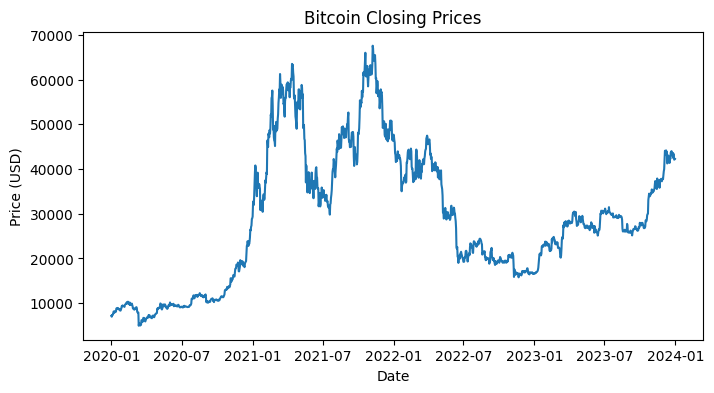

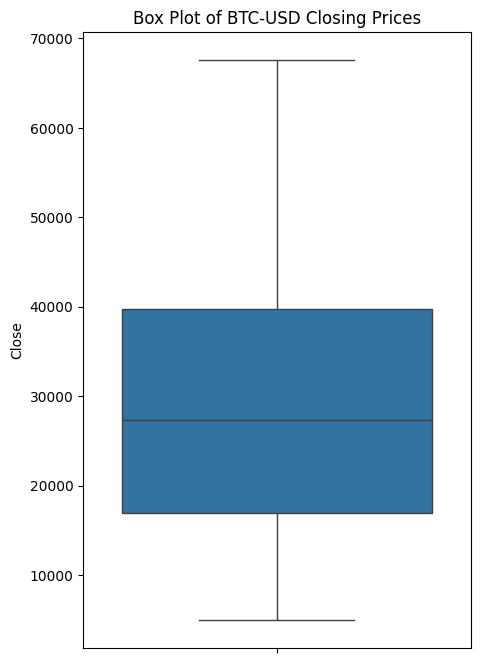

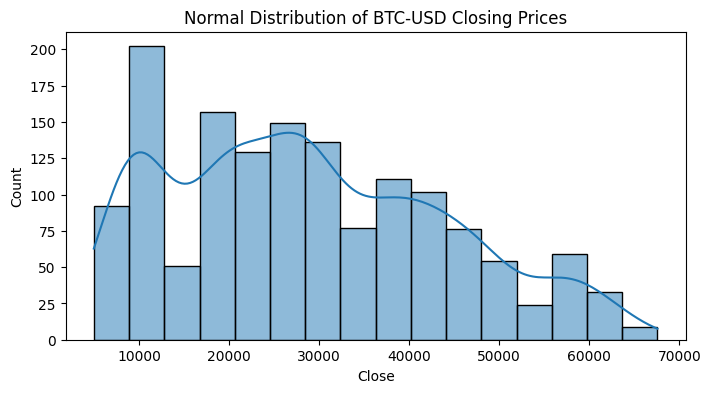

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller


# Download Bitcoin price data
btc = yf.download('BTC-USD', start='2020-01-01', end='2024-01-01')
# Use only the closing prices
btc = btc['Close']
# Keep the data under 2000 observations
btc = btc[-2000:]
print(btc.head())
btc = btc.dropna()

summary_stats = btc.describe()
print("Summary Statistics:\n", summary_stats)

plt.figure(figsize=(8, 4))
plt.plot(btc)
plt.title('Bitcoin Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

plt.figure(figsize=(5, 8))
sns.boxplot(btc)
plt.title('Box Plot of BTC-USD Closing Prices')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(btc, kde=True)
plt.title('Normal Distribution of BTC-USD Closing Prices')
plt.show()

The information gathered on BTC closing price from 2020-01-01 to 2024-01-01 with 2,000 onservation. The data exhibits a high rise in closing price around 2021 and droped in 2022 and began to rise again late 2023. The data is skewed to the right and therefore not symmetrical or normally distributed from the histogram plot. The boxplot above illustrates how the data is skewed to the right and just a small percentage of closing prices are low, while the majority are between large and average.

Skewness: 0.40625752037247037
Kurtosis: -0.7108641080596669
ADF Statistic: -1.742783172786874
p-value: 0.40921492825289607
Critical Value (1%): -3.4348647527922824
Critical Value (5%): -2.863533960720434
Critical Value (10%): -2.567831568508802
The time series is non-stationary (fail to reject the null hypothesis).


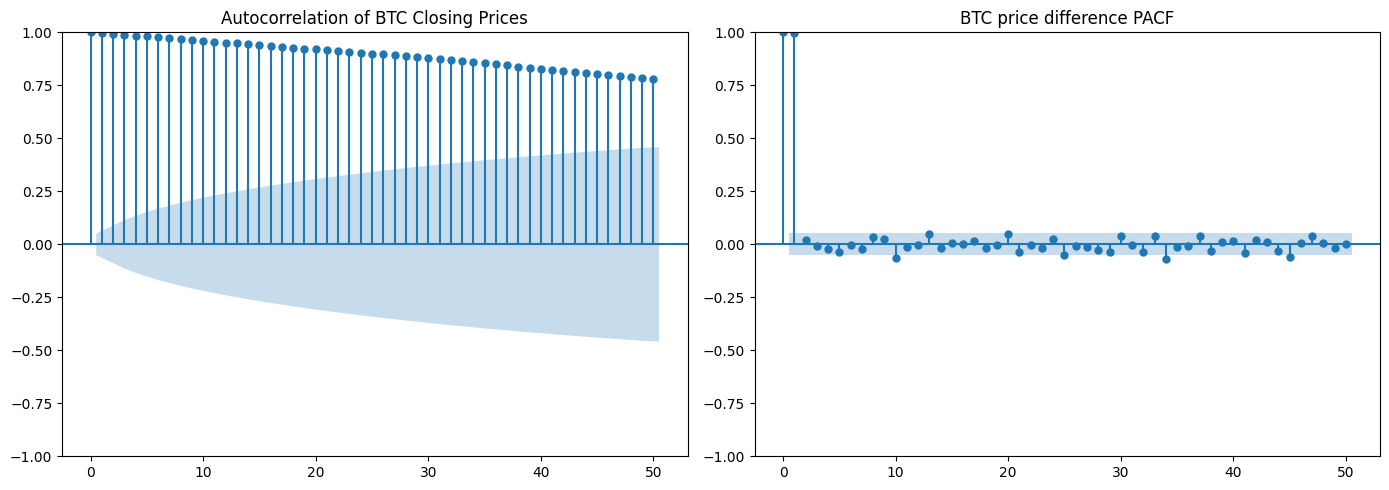

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import skew, kurtosis, norm

def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print(f'Critical Value ({key}):', value)

    if result[1] > 0.05:
      print("The time series is non-stationary (fail to reject the null hypothesis).")
    else:
      print("The time series is stationary (reject the null hypothesis).")

btc_skewness = skew(btc)
btc_kurtosis = kurtosis(btc)
print(f'Skewness: {btc_skewness}')
print(f'Kurtosis: {btc_kurtosis}')
adf_test(btc)

# Plot the autocorrelation function
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

plot_acf(btc, ax=axes[0], lags=50)
axes[0].set_title("Autocorrelation of BTC Closing Prices")
# ACF plot
# Differencing to make the time series stationary
btc_diff = btc.diff().dropna()
plot_pacf(btc, ax=axes[1], lags=50)
axes[1].set_title('BTC price difference PACF')

plt.tight_layout()
plt.show()

The ACF plot also shows a slow decreasing trend, which indicates a trend in the time series.The skewness is positively skewed slightly to the right and kurtosis letting us know that our distribution is flatter with fewer extreme values than a normal distribution.
We can test the stationality of our distribution using the Augmented Dickey-Fuller (ADF) test. The test statistic is -1.7428 which is less than zero. The p value is 0.4092 which indicate that the time series is non-stationary which means it has trends od seasonality.

## **1(b) Transform the Time Series to Achieve Stationarity**

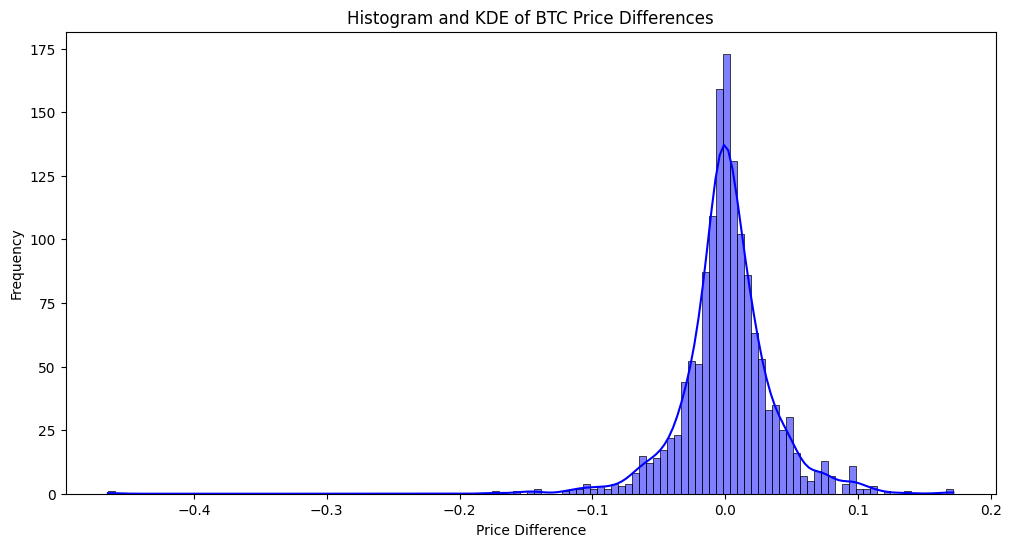

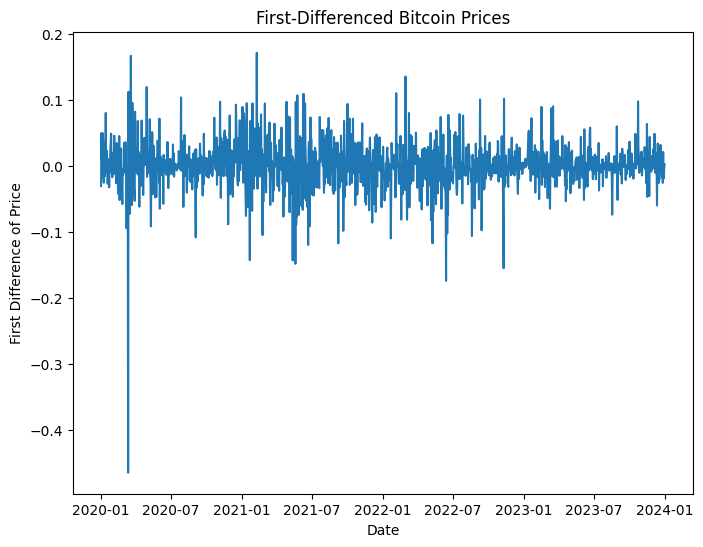

Summary Statistics:
 count    1460.000000
mean        0.001212
std         0.035480
min        -0.464730
25%        -0.013227
50%         0.000618
75%         0.016795
max         0.171821
Name: Close, dtype: float64
Skewness: -1.5853703073884713
Kurtosis: 22.52866702182096
ADF Test for First Differenced Series:
ADF Statistic: -12.340493029261056
p-value: 6.134306757250193e-23
Critical Value (1%): -3.4348647527922824
Critical Value (5%): -2.863533960720434
Critical Value (10%): -2.567831568508802
The time series is stationary (reject the null hypothesis).


In [ ]:
# Plotting Histogram with KDE

btc_diff = np.log(btc).diff().dropna()

plt.figure(figsize=(12, 6))
sns.histplot(btc_diff, kde=True, color='blue')
plt.title('Histogram and KDE of BTC Price Differences')
plt.xlabel('Price Difference')
plt.ylabel('Frequency')
plt.show()

# Plot differenced series
plt.figure(figsize=(8, 6))
plt.plot(btc_diff)
plt.title('First-Differenced Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('First Difference of Price')
plt.show()

summary_stats = btc_diff.describe()
print("Summary Statistics:\n", summary_stats)

btc_skewness = skew(btc_diff)
btc_kurtosis = kurtosis(btc_diff)
print(f'Skewness: {btc_skewness}')
print(f'Kurtosis: {btc_kurtosis}')

# ADF test for differenced series
print("ADF Test for First Differenced Series:")
adf_test(btc_diff)





**1(c) Using fractional differencing to obtain a new version of the time series that is stationary but retains relevant information about the data.**

Summary Statistics:
 count    534.000000
mean       0.000178
std        0.050066
min       -0.516824
25%       -0.021710
50%        0.001526
75%        0.022186
max        0.219376
dtype: float64
Skewness: 0.40625752037247037
Kurtosis: -0.7108641080596669
ADF Test for Fractionally Differenced Series:
ADF Statistic: -10.958818309957673
p-value: 8.427608831415639e-20
Critical Value (1%): -3.4428672600488066
Critical Value (5%): -2.8670609714890403
Critical Value (10%): -2.5697104770975057
The time series is stationary (reject the null hypothesis).


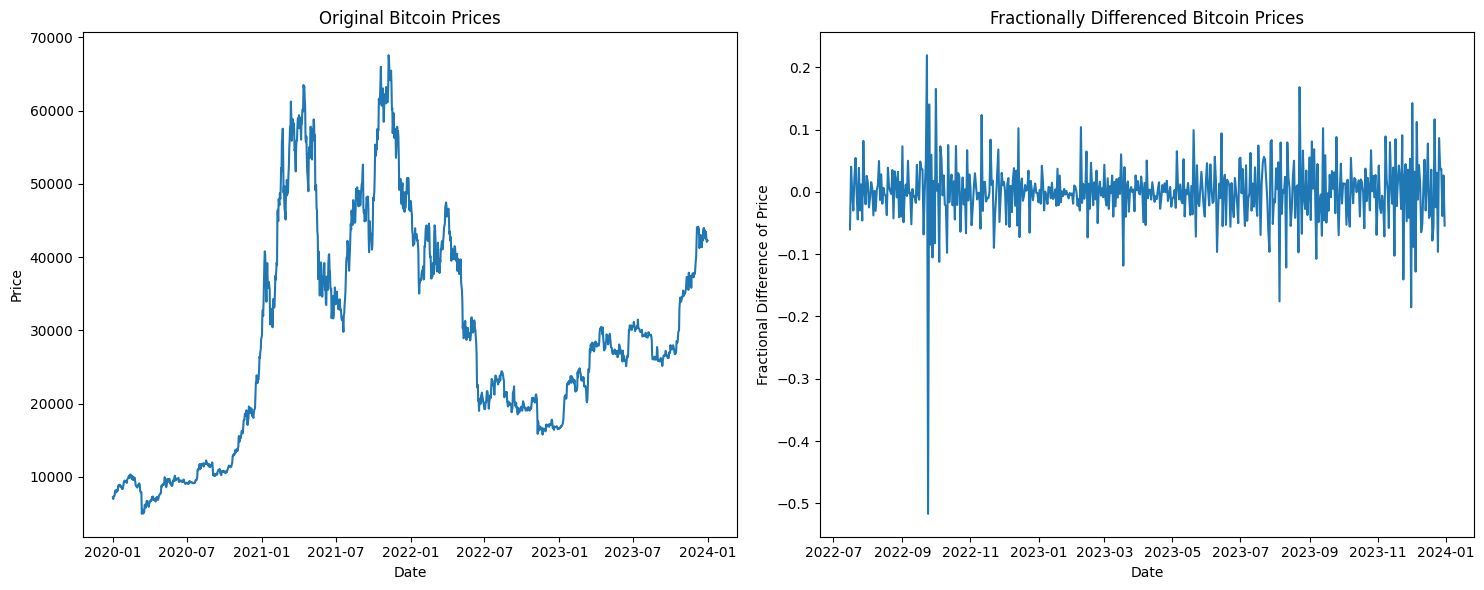

In [ ]:
import numpy as np
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.statespace.tools import diff

# Fractional differencing with d=0.5 as an example


def frac_diff(series, d, thresh=1e-5):
  w = [1.0]
  k = 1
  while True:
    w_ = -w[-1] * (d - k + 1) / k
    if abs(w_) < thresh:
      break
    w.append(w_)
    k += 1
  w = np.array(w)
  width = len(w)
  res = np.convolve(series, w[::-1], mode='valid')
  res = np.concatenate([np.full(width - 1, np.nan), res])
  return pd.Series(res, index=series.index)


btc_frac_diff = frac_diff(btc_diff, 0.5).dropna()

summary_stats = btc_frac_diff.describe()
print("Summary Statistics:\n", summary_stats)

btc_skewness = skew(btc)
btc_kurtosis = kurtosis(btc)
print(f'Skewness: {btc_skewness}')
print(f'Kurtosis: {btc_kurtosis}')

# ADF test for fractionally differenced series
print("ADF Test for Fractionally Differenced Series:")
adf_test(btc_frac_diff)


plt.figure(figsize=(15, 6))

# Original Bitcoin Prices
plt.subplot(1, 2, 1)
plt.plot(btc)
plt.title('Original Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Price')

# Fractionally Differenced Bitcoin Prices
plt.subplot(1, 2, 2)
plt.plot(btc_frac_diff)
plt.title('Fractionally Differenced Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Fractional Difference of Price')

plt.tight_layout()
plt.show()

**1(d) Comments on the 3 representations of the data.**

- **Original Time Series:**

The BTC data from 2,000 observation closing price shows a slight positive stewness which indicated a long right tail. The kurtosis was lower than the usual normal distribution which exhibit a fewer outliers.This however did not demonstrate non-stationality (stationality) in our data as evidenced by a higher p-value using ADF test. This means our data changes over time which is not suitable for modeling or prediction.

- **First Differenced Series:**

Differencing the series for the first time transform our data to stationality time series as indicated by the ADF test p-value and also by the line graph. The transformation however did produce a strong negative skweness which shows our data distribution now had a long left tail. Moreover, the kurtosis was very high signifying the presence of many extreme outliers opposite to the original time series distribution behaviour.
Although, differencing provided stationality, it affects the distribution, making the series more volatile and difficult to analyse.

- **Fractionally Differenced Series**

Fractional differencing provided a balance in achieving stationality and preserving the original distribution's characteristics. However, unlike the first differenced series, this maintained the original positively skewed and lower kurtosis. This indicate the retained shape of the original distribution while making the series easier to model, predict and interpret.

# **Step 2**

In [ ]:
!pip install tensorflow scikit-learn


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Define the number of lags
n_lags = 45

# Prepare the dataset with lags
def create_lagged_features(series, n_lags):
    df = pd.DataFrame(series)
    for i in range(1, n_lags + 1):
        df[f'lag_{i}'] = df['Close'].shift(i)
    df = df.dropna()
    return df

btc_lagged = create_lagged_features(btc, n_lags)

# Separate the features and target

X = btc_lagged.drop('Close', axis=1)
y = btc_lagged['Close']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the MLP model:
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=["accuracy"])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_51 (Dense)                     │ (None, 64)                  │           2,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,057 (19.75 KB)

 Trainable params: 5,057 (19.75 KB)

 Non-trainable params: 0 (0.00 B)

###  **Model and Training**
Model set up
- We used 2 hidden layers with 64 and 32 units respectively, and a single-unit output layer.
- We used ReLU activation function for the hidden layers.

Dropout
- We used dropout layer after the first hidden layers.
- We set number of dropout = 0.2 to shut down 20% of the units in the layer.

Optimization and Loss function
- We also used Adam for the optimization and mean_squared_error as loss function.

In [ ]:
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.0000e+00 - loss: 1339205248.0000 - val_accuracy: 0.0000e+00 - val_loss: 418014272.0000
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 1274860672.0000 - val_accuracy: 0.0000e+00 - val_loss: 417687648.0000
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0000e+00 - loss: 1280663552.0000 - val_accuracy: 0.0000e+00 - val_loss: 416837952.0000
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 1313272576.0000 - val_accuracy: 0.0000e+00 - val_loss: 415128544.0000
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 1326844160.0000 - val_accuracy: 0.0000e+00 - val_loss: 412216640.0000
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 1273839872.0000 - val_accuracy: 0.0000e+00 - val_loss: 407727328.0000
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0000e+00 - loss: 1272

In [ ]:
# Evaluate the model
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test_scaled)

print(f'Training Loss: {train_loss}')
print(f'Test Loss: {test_loss}')

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 3424969649551310848.0000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 3455705947349975040.0000 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Training Loss: [4.882329156337009e+18, 0.0]
Test Loss: [3.8964594769951457e+18, 0.0]
Mean Squared Error (MSE): 10792882.058429986
Mean Absolute Error (MAE): 2570.8969382702467


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


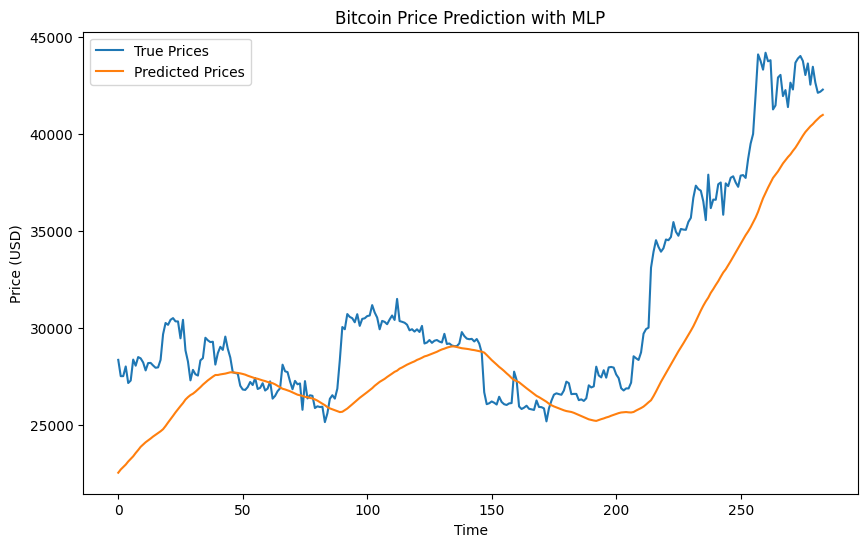

In [ ]:
# Evaluate the model:
y_prod = model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='True Prices')
plt.plot(y_prod, label='Predicted Prices')
plt.title('Bitcoin Price Prediction with MLP')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

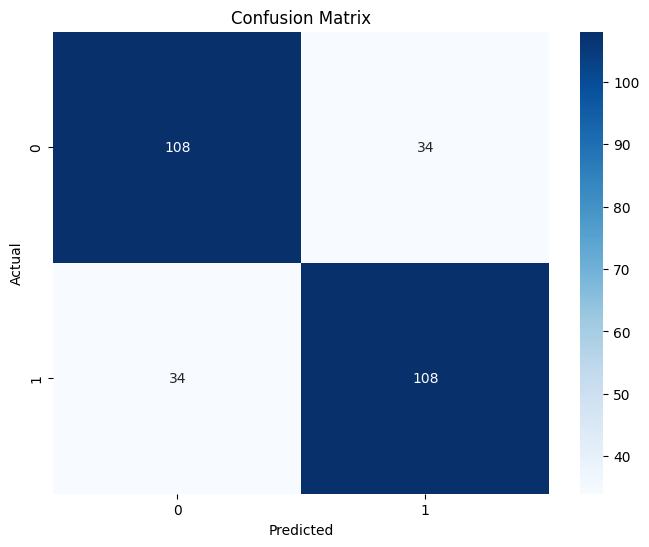

In [ ]:
y_test_class = np.where(y_test > np.median(y_test), 1, 0)  # Actual classes
y_pred_class = np.where(y_prod > np.median(y_prod), 1, 0)  # Predicted classes

cm = confusion_matrix(y_test_class, y_pred_class)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

- **Original Time Series**

As we already mentioned, the data have trends and seasonality patterns which might lead to difficulty in capturing complex and nonlinearity relationship dependencies giving wrong predictions. The data is non stational, which leads to the extremely high MSE and MAE indicating that the model struggles to predict. This indicate the difficulty in capturing the structure of the data due to those trends and seasonality, or noise from the original (raw) data.

In [ ]:
btc_diff_lagged = create_lagged_features(btc_diff, n_lags)


X1 = btc_diff_lagged.drop('Close', axis=1)
y1 = btc_diff_lagged['Close']

# Split into train and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, shuffle=False)

# Scale the data
scaler = MinMaxScaler()
X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)

# Build and train the MLP model:
model1 = Sequential()
model1.add(Dense(64, input_dim=n_lags, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1))

model1.compile(optimizer='adam', loss='mean_squared_error', metrics=["accuracy"])

model1.fit(X_train_scaled1, y_train1, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0656 - val_accuracy: 0.0000e+00 - val_loss: 0.0142
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0149 - val_accuracy: 0.0000e+00 - val_loss: 0.0015
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0060 - val_accuracy: 0.0000e+00 - val_loss: 0.0024
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0058 - val_accuracy: 0.0000e+00 - val_loss: 0.0010
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0042 - val_accuracy: 0.0000e+00 - val_loss: 0.0010
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0033 - val_accuracy: 0.0000e+00 - val_loss: 9.8140e-04
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0031 - val_accuracy: 0.0000e+00 - val_loss: 9.1383e-04
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0032 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 6.4590e-04 
Training Loss: [0.0022908372338861227, 0.0]
Test Loss: [0.0005978799308650196, 0.0]
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Mean Squared Error (MSE): 0.00041270517706120015
Mean Absolute Error (MAE): 0.013749075386834652
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


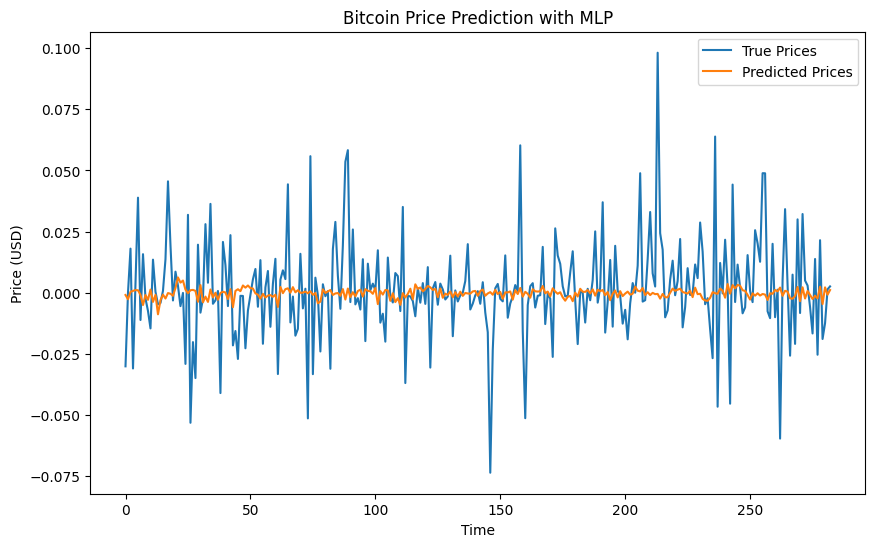

In [ ]:
# Evaluate the model
train_loss1 = model1.evaluate(X_train1, y_train1)
test_loss1 = model1.evaluate(X_test1, y_test1)

print(f'Training Loss: {train_loss1}')
print(f'Test Loss: {test_loss1}')

y_pred1 = model1.predict(X_test_scaled1)
mse = mean_squared_error(y_test1, y_pred1)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test1, y_pred1)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

# Evaluate the model:
y_pred1 = model1.predict(X_test_scaled1)

plt.figure(figsize=(10, 6))
plt.plot(y_test1.values, label='True Prices')
plt.plot(y_pred1, label='Predicted Prices')
plt.title('Bitcoin Price Prediction with MLP')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

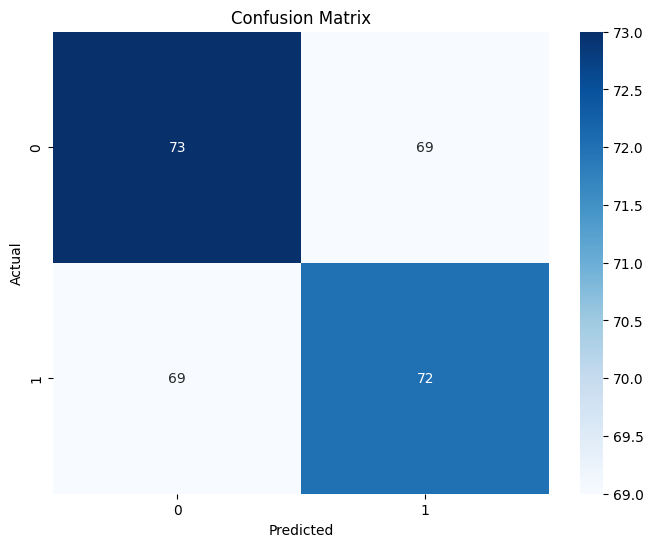

In [ ]:
y_test_class1 = np.where(y_test1 > np.median(y_test1), 1, 0)  # Actual classes
y_pred_class1 = np.where(y_pred1 > np.median(y_pred1), 1, 0)  # Predicted classes

cm1 = confusion_matrix(y_test_class1, y_pred_class1)

plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


- **First Differencing Time Series**

Also as we already mentioned, the data has been transform from the original state by removing trends and seasonality patterns to make it stational. This makes our data constant over time which lead to the significant reduction of in the extremely high MSE and MAE as compared to the original time series. This means our stationality has helped the model to learn or capture more patterns in the underlying data structure. The low error indicate an increase in prediction accuracy..

In [ ]:
def create_lagged_features(series, n_lags):
    df = pd.DataFrame(series)
    for i in range(1, n_lags + 1):
        df[f'lag_{i}'] = df[0].shift(i)
    df = df.dropna()
    return df

btc_frac_diff_lagged = create_lagged_features(btc_frac_diff, n_lags)

X = btc_frac_diff_lagged.drop([0], axis=1)
y = btc_frac_diff_lagged[0]

# Split into train and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale the data
scaler = MinMaxScaler()
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

# Build and train the MLP model:
model2 = Sequential()
model2.add(Dense(64, input_dim=n_lags, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1))

model2.compile(optimizer='adam', loss='mean_squared_error', metrics=["accuracy"])

model2.fit(X_train_scaled2, y_train2, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.0000e+00 - loss: 0.0277 - val_accuracy: 0.0000e+00 - val_loss: 0.0104
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0088 - val_accuracy: 0.0000e+00 - val_loss: 0.0044
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0076 - val_accuracy: 0.0000e+00 - val_loss: 0.0036
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0049 - val_accuracy: 0.0000e+00 - val_loss: 0.0045
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0041 - val_accuracy: 0.0000e+00 - val_loss: 0.0046
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0037 - val_accuracy: 0.0000e+00 - val_loss: 0.0031
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0028 - val_accuracy: 0.0000e+00 - val_loss: 0.0035
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0042 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0028 
Training Loss: [0.0026893613394349813, 0.0]
Test Loss: [0.003359615569934249, 0.0]
Mean Squared Error (MSE): 0.002854065832956358
Mean Absolute Error (MAE): 0.0424939228730026


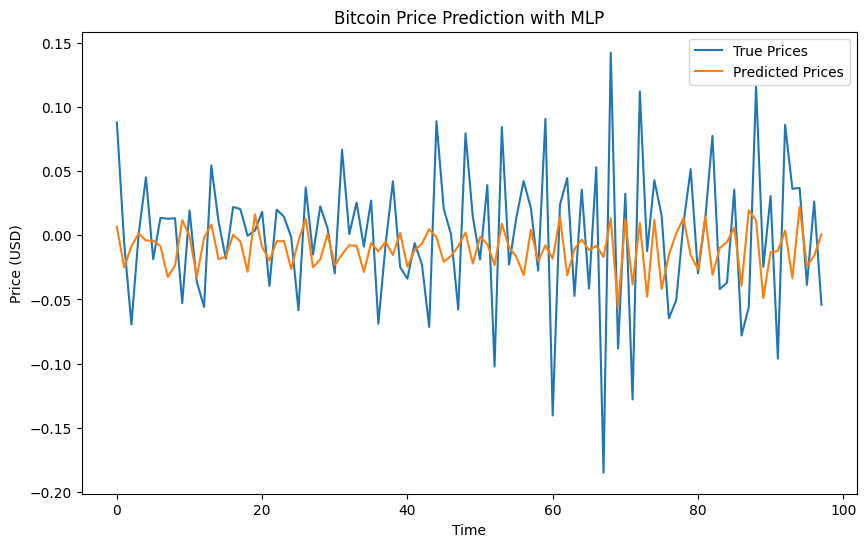

In [ ]:
# Evaluate the model

y_pred2 = model2.predict(X_test_scaled2)
train_loss = model2.evaluate(X_train2, y_train2)
test_loss = model2.evaluate(X_test2, y_test2)

print(f'Training Loss: {train_loss}')
print(f'Test Loss: {test_loss}')

mse = mean_squared_error(y_test2, y_pred2)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test2, y_pred2)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")


plt.figure(figsize=(10, 6))
plt.plot(y_test2.values, label='True Prices')
plt.plot(y_pred2, label='Predicted Prices')
plt.title('Bitcoin Price Prediction with MLP')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

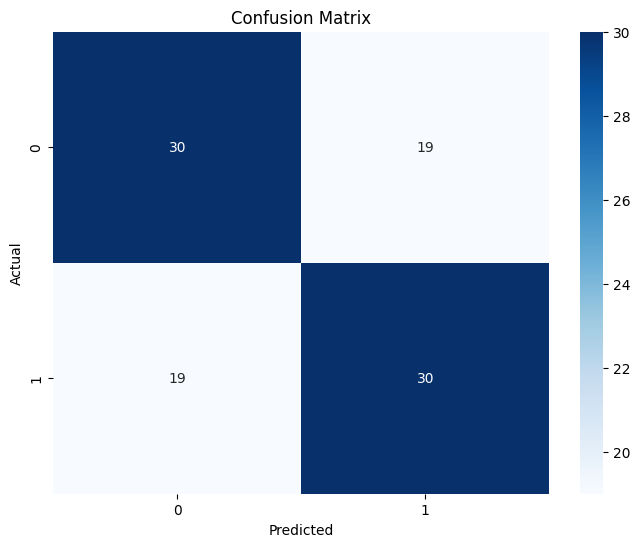

In [ ]:
y_test_class2 = np.where(y_test2 > np.median(y_test2), 1, 0)  # Actual classes
y_pred_class2 = np.where(y_pred2 > np.median(y_pred2), 1, 0)  # Predicted classes

cm2 = confusion_matrix(y_test_class2, y_pred_class2)

plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


- **Fractionally Differencing Time Series**

Lastly as we already mentioned as well, the data has been allowed to acchieve stationality while retaining long-term dependencies and structure in memory.  This makes our data learn from complex data and has lead to extremely low MSE and MAE as compared to the the previous 2 time series. This means our stationality has helped the model to capture long term and short term dependencies with increase in accuracy. This approach offers the best performance when the series has persistent long-term memory.


**d**

- **Model Performance**

Considering the three models, the MLP model using the fractionally differenced time series clearly outperforms the other two models, with the lowest MSE and MAE by several orders of magnitude. It is also evident in the visualization of the predicted values and actual values in the line graph. This suggests that fractional differencing does not only result in stationarity but also keeps important information that allows the model to make highly accurate predictions on complex data structures.

- **Error Analysis**

The original time series model had the highest error metrics, indicating poor performance in capturing the underlying structures in the data. The stationary series model performs better, reducing errors significantly, but still falls short of the fractionally differenced mlp model. The fractionally differenced mlp model held stationality and long term dependencies which did well in capturing both short-term and long-term patterns whiles maintaining lowest error.

- **Practical Implications**

As we all know, the real world times series data are mostly complex and filled with trends and seasonality. For such time series data with complex dependencies and nonlinear patterns, the fractionally differenced approach appears to be the most effective. However, if the primary goal is short-term prediction and the series can be easily transformed into a stationary one, the MLP with the stationary series might be sufficient subject to other evaluations. The original series mlp model is less recommended due to its poor performance in capturing the intricacies of the data.

**Step 3**

**3(a) Using the GAF representation of the time series in levels, we build and train a CNN that is designed to predict the level of the time series.**

In [ ]:
pip install pyts

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from pyts.image import GramianAngularField
from sklearn.model_selection import train_test_split

# Download Bitcoin price data
btc = yf.download('BTC-USD', start='2020-01-01', end='2024-01-01')['Close']
btc = btc[-2000:].dropna()

# Define parameters for windowing
window_size = 45  # Size of each window
step_size = 5     # Step size for the sliding window

# Create windows of the time series
windows = []
for i in range(0, len(btc) - window_size, step_size):
    window = btc.values[i:i + window_size]
    windows.append(window)

# Convert windows to GAF images
gaf = GramianAngularField(image_size=window_size, method='summation')
X_gaf = gaf.fit_transform(np.array(windows))

# Reshape for CNN input
X_gaf = X_gaf.reshape(X_gaf.shape[0], window_size, window_size, 1)

# Target values (using the next closing price as the target)
y = btc[window_size:].values[:len(X_gaf)]

# Train/test split
X_train_gaf, X_test_gaf, y_train_gaf, y_test_gaf = train_test_split(X_gaf, y, test_size=0.2, shuffle=False)


[*********************100%%**********************]  1 of 1 completed


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential()

# First convolutional layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(45, 45, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=["accuracy"])

# Model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)                   │ (None, 43, 43, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 21, 21, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 19, 19, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 9, 9, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_21 (Flatten)                 │ (None, 5184)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_81 (Dense)                     │ (None, 128)                 │         663,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_82 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 682,625 (2.60 MB)

 Trainable params: 682,625 (2.60 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train_gaf, y_train_gaf, epochs=50, validation_split=0.2)

# Evaluate on test data
test_loss = model.evaluate(X_test_gaf, y_test_gaf)
print(f"Test Loss: {test_loss}")


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.0000e+00 - loss: 81587448.0000 - val_accuracy: 0.0000e+00 - val_loss: 122087312.0000
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.0000e+00 - loss: 76275640.0000 - val_accuracy: 0.0000e+00 - val_loss: 119280528.0000
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.0000e+00 - loss: 75292864.0000 - val_accuracy: 0.0000e+00 - val_loss: 111974176.0000
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.0000e+00 - loss: 70744872.0000 - val_accuracy: 0.0000e+00 - val_loss: 96769960.0000
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.0000e+00 - loss: 54136188.0000 - val_accuracy: 0.0000e+00 - val_loss: 70503968.0000
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.0000e+00 - loss: 31161696.0000 - val_accuracy: 0.0000e+00 - val_loss: 35278028.0000
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.0000e+00 - loss: 10179577.0000 - val_accuracy: 0

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


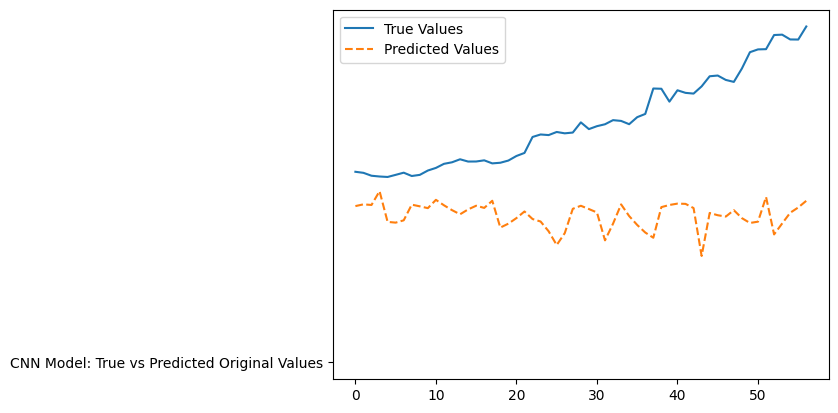

In [ ]:
# Predict on the test data
y_pred_gaf = model.predict(X_test_gaf)

# Plot true vs predicted values
import matplotlib.pyplot as plt

plt.plot(y_test_gaf, label='True Values')
plt.plot(y_pred_gaf, label='Predicted Values', linestyle='--')
plt.plot('CNN Model: True vs Predicted Original Values')
plt.legend()
plt.show()


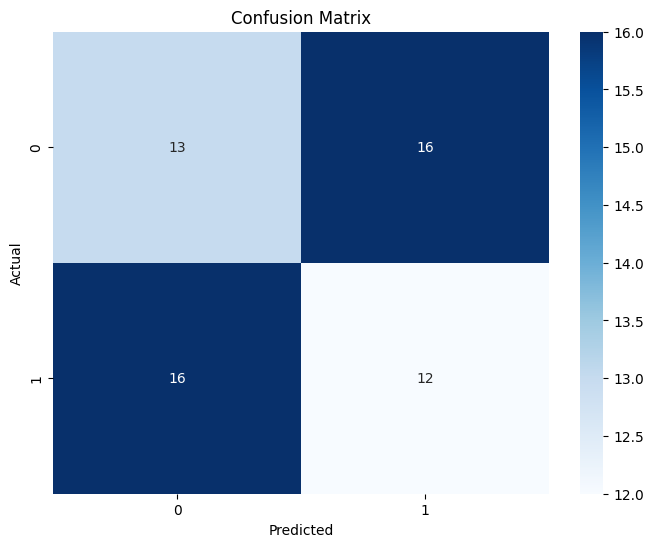

In [ ]:
y_test_class = np.where(y_test_gaf > np.median(y_test_gaf), 1, 0)  # Actual classes
y_pred_class = np.where(y_pred_gaf > np.median(y_pred_gaf), 1, 0)  # Predicted classes

cm = confusion_matrix(y_test_class, y_pred_class)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**3(b) Using the GAF representation of the stationary time series, we build and train an MLP that is designed to predict the stationary version of the time series.**

In [ ]:
import numpy as np
from pyts.image import GramianAngularField
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load Bitcoin price data
time_series1 = btc.values
image_size = 32

# Apply logarithmic transformation
log_series1 = np.log(time_series1 + 1e-6)

def create_gaf_image(series, image_size):
    gaf = GramianAngularField(image_size=image_size, method='summation')
    gaf_image = gaf.fit_transform(series.reshape(1, -1))
    return gaf_image[0]

# Generate GAF images for segments of the log-transformed series
X_log_images1 = []
for i in range(len(log_series1) - image_size + 1):
    series_segment1 = log_series1[i:i + image_size]
    gaf_image = create_gaf_image(series_segment1, image_size)
    X_log_images1.append(gaf_image)

X_log_images1 = np.array(X_log_images1)
X_log_images1 = X_log_images1.reshape(-1, image_size, image_size, 1)  # Reshape for MLP input

# The target for the log-transformed series would be the log-transformed values
y_log1 = log_series1[image_size - 1:]
X_diff_train_log, X_diff_test_log, y_diff_train_log, y_diff_test_log = train_test_split(
    X_log_images1, y_log1, test_size=0.2, random_state=42
)

# Define the MLP model
mlp_model = Sequential([
    Flatten(input_shape=(image_size, image_size, 1)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='linear')
])

# Compile the model
mlp_model.compile(optimizer=Adam(), loss='mse', metrics=["accuracy"])

# Train the model
mlp_model.fit(X_diff_train_log, y_diff_train_log, epochs=50, batch_size=32, validation_data=(X_diff_test_log, y_diff_test_log))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0000e+00 - loss: 26.0397 - val_accuracy: 0.0000e+00 - val_loss: 1.5382
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 6.9872 - val_accuracy: 0.0000e+00 - val_loss: 1.7110
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 5.4902 - val_accuracy: 0.0000e+00 - val_loss: 1.0919
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 5.4423 - val_accuracy: 0.0000e+00 - val_loss: 0.9870
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 4.5764 - val_accuracy: 0.0000e+00 - val_loss: 0.8199
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 4.8237 - val_accuracy: 0.0000e+00 - val_loss: 1.0548
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 4.5760 - val_accuracy: 0.0000e+00 - val_loss: 1.9045
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+0

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 1.0063 
Test Loss: [1.0832544565200806, 0.0]
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


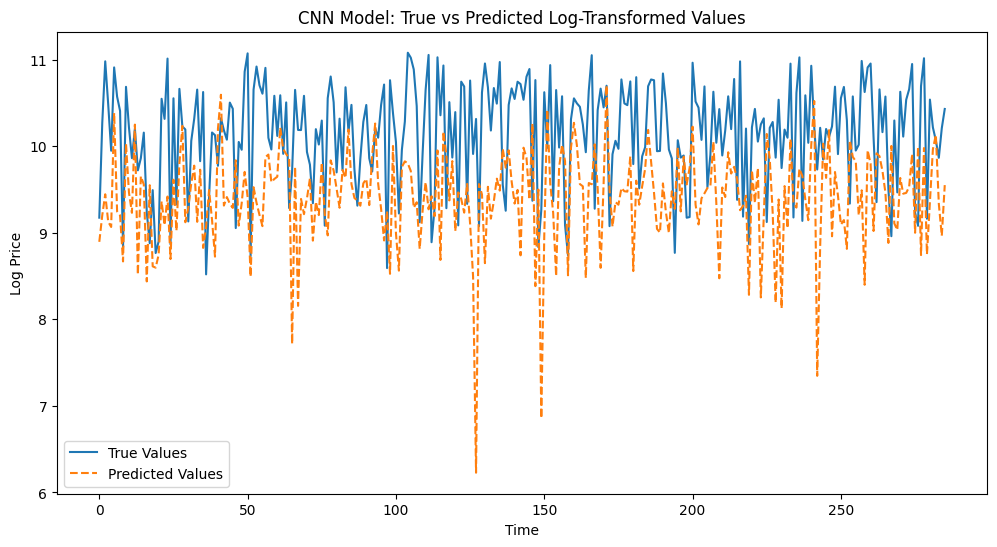

In [ ]:
# Evaluate the model on the test set
test_loss = mlp_model.evaluate(X_diff_test_log, y_diff_test_log)
print(f'Test Loss: {test_loss}')

# Predict and visualize the results
y_pred_log = mlp_model.predict(X_diff_test_log)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_diff_test_log, label='True Values')
plt.plot(y_pred_log, label='Predicted Values', linestyle='--')
plt.legend()
plt.title('CNN Model: True vs Predicted Log-Transformed Values')
plt.xlabel('Time')
plt.ylabel('Log Price')
plt.show()


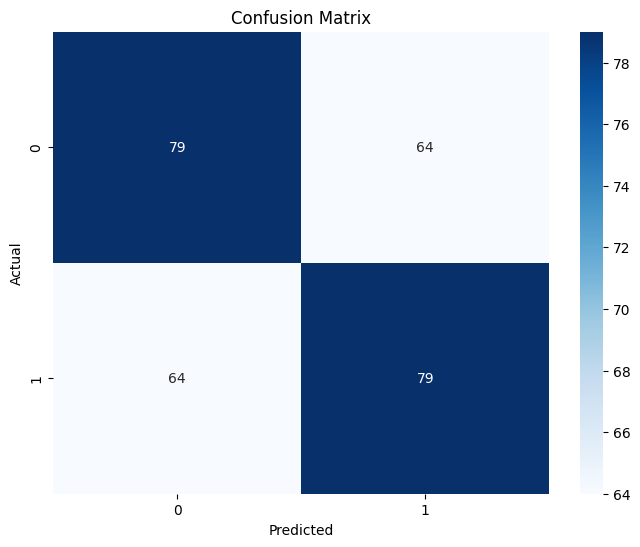

In [ ]:
y_test_class = np.where(y_diff_test_log > np.median(y_diff_test_log), 1, 0)
y_pred_class = np.where(y_pred_log > np.median(y_pred_log), 1, 0)

cmc1 = confusion_matrix(y_test_class, y_pred_class)

plt.figure(figsize=(8, 6))
sns.heatmap(cmc1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**3(c) Using the GAF representation of the fractionally-differenced time series, we build and train a CNN that is designed to predict the fractionally-differenced version of the time series.**

In [ ]:
import numpy as np
from scipy.special import gamma

def fractional_difference(series, d, thresh=1e-5):
    """
    Perform fractional differencing on a time series.
    :param series: The original time series.
    :param d: The differencing order.
    :param thresh: Threshold to truncate small weights.
    :return: Fractionally differenced time series.
    """
    series = np.asarray(series)
    weights = []

    # Calculate weights using the gamma function to avoid overflow issues
    for k in range(len(series)):
        weight = (-1) ** k * gamma(d + 1) / (gamma(k + 1) * gamma(d - k + 1))
        if abs(weight) < thresh:
            break
        weights.append(weight)

    weights = np.array(weights[::-1])  # Reverse the weights to apply correctly

    # Apply the weights to the series using convolution
    series_diff = np.convolve(series, weights, mode='valid')

    return np.concatenate((np.zeros(len(series) - len(series_diff)), series_diff))

# Load Bitcoin price data
time_series = btc_frac_diff.values
d = 0.4  # Differencing order

frac_diff_series = fractional_difference(time_series, d)

image_size = 32  # Size of the GAF image

# Generate GAF images for segments of the fractionally-differenced series

def create_gaf_image(series, image_size):
    gaf = GramianAngularField(image_size=image_size, method='summation')
    gaf_image = gaf.fit_transform(series.reshape(1, -1))
    return gaf_image[0]

# Generate GAF images for segments of the fractionally-differenced series
X_diff_images = []
for i in range(len(frac_diff_series) - image_size + 1):
    series_segment = frac_diff_series[i:i + image_size]
    gaf_image = create_gaf_image(series_segment, image_size)
    X_diff_images.append(gaf_image)

X_diff_images = np.array(X_diff_images)
X_diff_images = X_diff_images.reshape(-1, image_size, image_size, 1)  # Reshape for CNN input

# The target is the fractionally-differenced series values
y_diff = frac_diff_series[image_size - 1:]

# Split the data into training and testing sets
X_train_diff, X_test_diff, y_train_diff, y_test_diff = train_test_split(
    X_diff_images, y_diff, test_size=0.2, random_state=42
)

# Define the CNN model
cnn_model1 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(image_size, image_size, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='linear')
])

# Compile the model
cnn_model1.compile(optimizer=Adam(), loss='mse', metrics=["accuracy"])

# Train the model
cnn_model1.fit(X_train_diff, y_train_diff, epochs=50, batch_size=32, validation_data=(X_test_diff, y_test_diff))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.2499 - loss: 0.1986 - val_accuracy: 0.3168 - val_loss: 0.0032
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.2736 - loss: 0.0023 - val_accuracy: 0.3168 - val_loss: 0.0028
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.2473 - loss: 0.0021 - val_accuracy: 0.3168 - val_loss: 0.0028
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.2839 - loss: 0.0030 - val_accuracy: 0.3168 - val_loss: 0.0028
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.2715 - loss: 0.0017 - val_accuracy: 0.3168 - val_loss: 0.0028
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.2494 - loss: 0.0039 - val_accuracy: 0.3168 - val_loss: 0.0028
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.2685 - loss: 0.0021 - val_accuracy: 0.3168 - val_loss: 0.0028
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.2488 - loss: 0.0014 - val_accuracy: 0.3168 - val_loss: 0.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3153 - loss: 0.0028
Test Loss: [0.0032169308979064226, 0.31683167815208435]
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step


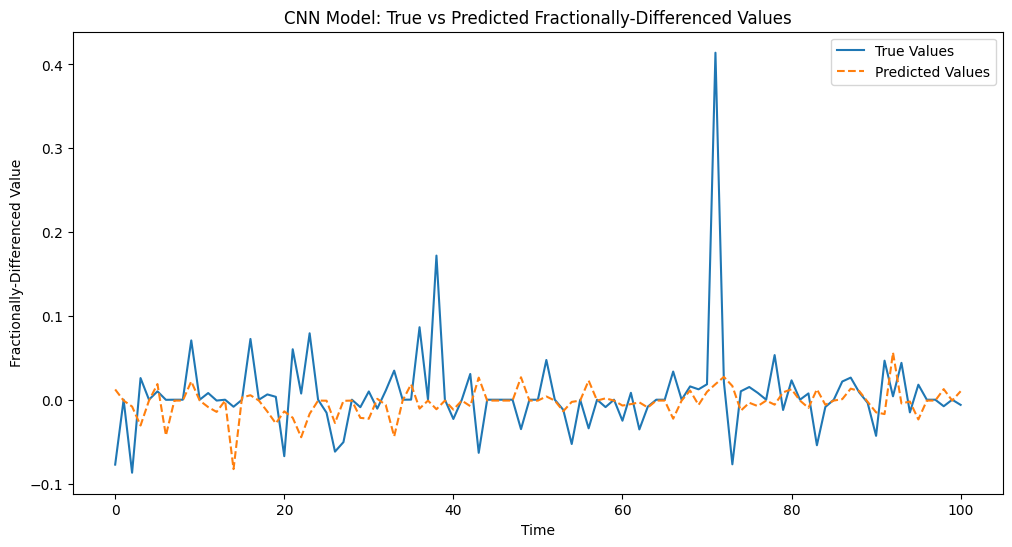

In [ ]:
# Evaluate the model on the test set
test_loss = cnn_model1.evaluate(X_test_diff, y_test_diff)
print(f'Test Loss: {test_loss}')

# Predict and visualize the results
y_pred_diff = cnn_model1.predict(X_test_diff)

plt.figure(figsize=(12, 6))
plt.plot(y_test_diff, label='True Values')
plt.plot(y_pred_diff, label='Predicted Values', linestyle='--')
plt.legend()
plt.title('CNN Model: True vs Predicted Fractionally-Differenced Values')
plt.xlabel('Time')
plt.ylabel('Fractionally-Differenced Value')
plt.show()


**Characterization of the fractionally-differenced time series data**

**Obervations on C**

There are various advantages to adopting the fractionally-differenced time series' GAF representation and training a CNN to predict the fractionally-differenced form of the time series.

- *Enhanced accuracy in forecasting:* The CNN model that was trained using the GAF representation possesses the the capacity to identify intricate links and patterns in the time series data, which resulted in enhanced predictive effectiveness in relation to alternative models.

- *Preserving pertinent data:* The GAF representation converts the fractionally-differenced time series into an image-like format while keeping all pertinent data. This enables CNN to identify important characteristics in the data, which could result in more accurate forecasts.

- *Automatic feature extraction:* Relevant features can be automatically learned and extracted from the input data by CNNs. This saves time and effort during the modeling phase by doing away with the necessity for manual feature engineering.

- *Robustness against noise:* The GAF representation lessens the influence of data noise. The CNN can concentrate on the important patterns and structures while being less impacted by noise or minute oscillations in the data by converting the time series into an image representation.


**d. Comparison**

a.We built and trained a CNN that was used to forecast the time series' level using the GAF representation of the time series in levels: When the time series in levels shows observable patterns and features that the CNN can efficiently capture, we utilize the option because it is useful to model performance.

b. We built and trained an MLP that that was used to forecast the stationary form of the time series using the GAF representation of the stationary time series: This choice is appropriate in cases where the stationary time series has significant characteristics and patterns that the MLP can detect. MLPs can handle nonlinearity in the data and are good at learning complex relationships.

c. Using the GAF representation of the fractionally-differenced time series, we built and trained a CNN that is designed to predict the fractionally-differenced version of the time series: This option can be advantageous when the fractionally-differenced time series exhibits complex and long-term dependencies. The CNN can exploit the spatial patterns in the GAF which is very useful for data with higher dimensions like images and text analysis.

# **Step 4**
When we observe the results from both CNN and MLP models, the we can track the cause to it architecture and characteristics of the time series. The CNN and MLP model architectures resulted into the difference forms of performance metrics and graphs provided. Due to the CNN and the MLP distinct approach, we achieved different results on the performance using the same sets of time series data.

The CNN is very high in capturing the structural and spatial pattern, and local dependencies in GAF representation. This makes it very effective for images.The models layers used in CNN are very ggod for capturing edges, textures etc, before making sense out of it. This made it suitable for our time series data to exhibit visually distinguishable patterns. The CNN model does so well due to the multiple layers and each layer is built upon the previous one allowing the model to learn from bth simple and complex data pattern in the GAF images.

Conversely, the MLP is versatile ifn capturing structural patterns in complex relationship and non-linear dependencies in the data when there are more intricate or global dependencies in the time series. Unlike CNN, the MLP we flattern our data before MLP was able to accept it. When this happen, spatial relationships are lost making it hard to detect important structurs or features in the data. This is one of the main reason why it performed lesser than CNN. The lost of spatial information also could lead to underfitting.

In summary, the CNN performs more than the MLP due to the suitability of handing the dataset that GAF transformation produces. The MLP could have performed well with more simple and linear data. The complexity and spatial pattern captured by the GAF images made it difficult for MLP to perform or learn well. On the other hand, the CNN properties to model and interpret these patterns.

# **Reference**
Zhang, Ashton, et al. Dive into Deep Learning. https://d2l.ai/d2l-en.pdf.

De Vitry, Louis. Encoding Time Series as Images. https://medium.com/analytics-vidhya/encoding-time-series-as-images-b043becbdbf3